<a href="https://colab.research.google.com/github/LakshmiSrikumar/Classifcation_Infosys_Internship_Oct2024/blob/main/Lakshmi/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from bing_image_downloader import downloader

# Download images
downloader.download("Dogs", limit=100, output_dir="F:/Image_dataset/Dataset1/Train", adult_filter_off=True, force_replace=False, timeout=60)

print("Image download completed successfully.")

[%] Downloading Images to /content/F:/Image_dataset/Dataset1/Train/Dogs


[!!]Indexing page: 1

[%] Indexed 95 Images on Page 1.


[%] Downloading Image #1 from https://keyassets.timeincuk.net/inspirewp/live/wp-content/uploads/sites/8/2021/02/GettyImages-997141470-e1614176377827.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.hdnicewallpapers.com/Walls/Big/Dog/Beautiful_Dog_Puppy_4K_Wallpaper.jpg
[Error]Invalid image, not saving https://www.hdnicewallpapers.com/Walls/Big/Dog/Beautiful_Dog_Puppy_4K_Wallpaper.jpg

[!] Issue getting: https://www.hdnicewallpapers.com/Walls/Big/Dog/Beautiful_Dog_Puppy_4K_Wallpaper.jpg
[!] Error:: Invalid image, not saving https://www.hdnicewallpapers.com/Walls/Big/Dog/Beautiful_Dog_Puppy_4K_Wallpaper.jpg

[%] Downloading Image #2 from https://paradepets.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTkxMzY1Nzg4NjczMzIwNTQ2/cutest-dog-breeds-jpg.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https

In [ ]:
downloader.download("Cats", limit=100, output_dir="F:/Image_dataset/Dataset1/Train", adult_filter_off=True, force_replace=False, timeout=60)

print("Image download completed successfully.")

[%] Downloading Images to /content/F:/Image_dataset/Dataset1/Train/Cats


[!!]Indexing page: 1

[%] Indexed 93 Images on Page 1.


[%] Downloading Image #1 from https://wallpaperaccess.com/full/2111331.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallup.net/wp-content/uploads/2019/09/708260-kittens-kitten-cat-cats-baby-cute.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://images6.fanpop.com/image/photos/36700000/Cats-image-cats-36712807-1600-1200.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.rd.com/wp-content/uploads/2021/04/GettyImages-988013222-scaled-e1618857975729.jpg?w=1670
[%] File Downloaded !

[%] Downloading Image #5 from http://images4.fanpop.com/image/photos/16000000/Beautiful-Cat-cats-16096437-1280-800.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://topsten.com/wp-content/uploads/2013/09/JarnacBepacific1an_1280x1024-1200x960.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://png.pngtree.

In [ ]:
training_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range= 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
    validation_split =  0.2
)

In [ ]:
train_dir = 'F:/Image_dataset/Dataset1/Train'

In [ ]:
train_generator= training_generator.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'training',
    shuffle = True
)

Found 160 images belonging to 2 classes.


In [ ]:
validation_generator  = training_generator.flow_from_directory(
    train_dir,
    target_size  = (224,224),
    batch_size  = 16,
    class_mode  = 'binary',
    subset  = 'validation',
    shuffle = True
)

Found 38 images belonging to 2 classes.


In [ ]:
# Building the CNN model

model = Sequential([
    Conv2D(32, (3,3), activation = 'relu' , input_shape = (224,224,3)),
    MaxPool2D(pool_size  = (2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPool2D(pool_size  = (2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPool2D(pool_size  = (2,2)),
    Flatten(),
    Dense(128, activation = 'relu' ),
    Dense(1 , activation = 'sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#Learning Rate =0.001

In [ ]:
model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss  = 'binary_crossentropy', # categorical_crossentropy
    metrics = ['accuracy']
)

In [ ]:
# training model
history = model.fit(
    train_generator,
    epochs = 10,
    validation_data = validation_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 5s/step - accuracy: 0.4990 - loss: 2.3397 - val_accuracy: 0.5000 - val_loss: 0.7191
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.5100 - loss: 0.7081 - val_accuracy: 0.5000 - val_loss: 0.6883
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - accuracy: 0.5406 - loss: 0.6671 - val_accuracy: 0.6579 - val_loss: 0.6584
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 5s/step - accuracy: 0.6132 - loss: 0.6707 - val_accuracy: 0.6053 - val_loss: 0.6140
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.6324 - loss: 0.6230 - val_accuracy: 0.5789 - val_loss: 0.6442
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 4s/step - accuracy: 0.5914 - loss: 0.6368 - val_accuracy: 0.6842 - val_loss: 0.6305
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6839 - loss: 0.6087 - val_accuracy: 0.6579 - val_loss: 0.6043
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 5s/step - accuracy: 0.5995 - loss: 0.6329 - val_accuracy: 0.7368 - val_loss: 0.5686
Epoch 9/10
5/5 ━━━━

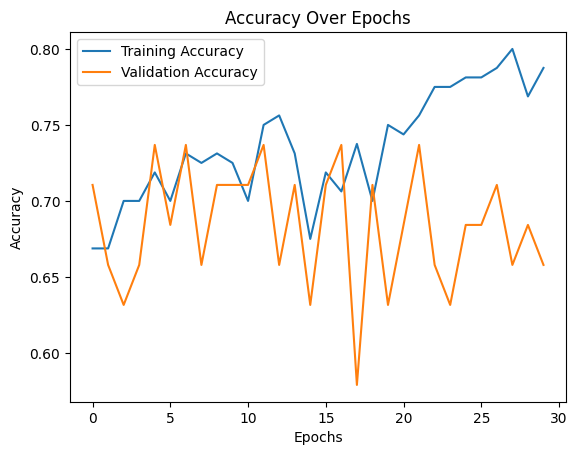

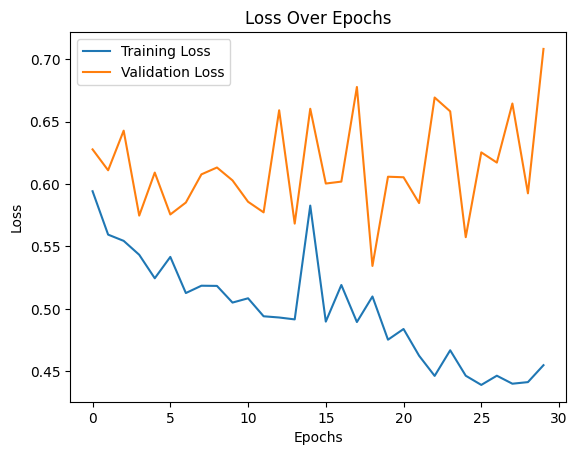

In [ ]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Save the accuracy plot
plt.savefig(r"F:\Image_dataset\Dataset1\Accuracy_001.pdf")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Learning Rate = 0.0001

In [ ]:
model.compile(
    optimizer = Adam(learning_rate = 0.0001),
    loss  = 'binary_crossentropy', # categorical_crossentropy
    metrics = ['accuracy']
)

In [ ]:
# training model
history = model.fit(
    train_generator,
    epochs = 30,
    validation_data = validation_generator
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:935: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 5s/step - accuracy: 0.6504 - loss: 0.6004 - val_accuracy: 0.7105 - val_loss: 0.6277
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.7008 - loss: 0.5528 - val_accuracy: 0.6579 - val_loss: 0.6110
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 45s 5s/step - accuracy: 0.6812 - loss: 0.5744 - val_accuracy: 0.6316 - val_loss: 0.6427
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.6938 - loss: 0.5596 - val_accuracy: 0.6579 - val_loss: 0.5747
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7374 - loss: 0.5098 - val_accuracy: 0.7368 - val_loss: 0.6091
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.6882 - loss: 0.5487 - val_accuracy: 0.6842 - val_loss: 0.5756
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.7403 - loss: 0.5015 - val_accuracy: 0.7368 - val_loss: 0.5851
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.7317 - loss: 0.5176 - val_accuracy: 0.6579 - val_loss: 0.6077
Epoch 9/30
5/5 ━━━━

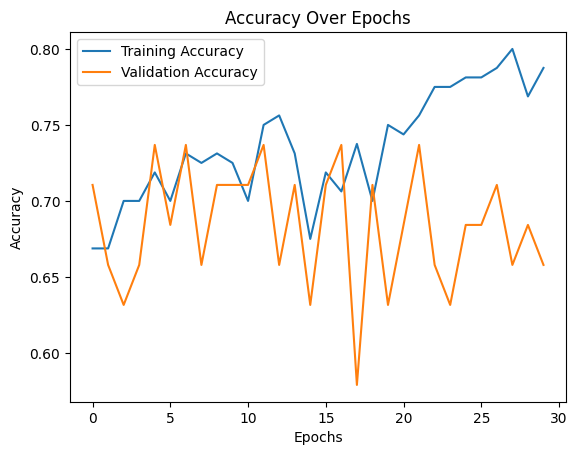

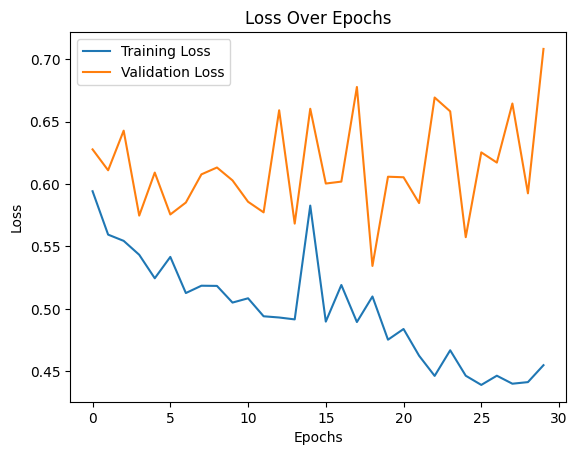

In [ ]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Save the accuracy plot
plt.savefig(r"F:\Image_dataset\Dataset1\Accuracy_0001.pdf")
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()